# Ames Housing Sale Price Analysis

 Victor Mujica 

## Executive Summary

    In the next project, a data set containing information on home sales in Ames, Iowa between 2006 and 2010 will be published, in which significant analyzes related to the number of homes sold and their market price during the period of time will be performed. mentioned time. In addition, the number of houses sold will be analyzed according to their general quality. Last but not least, the relationship between the total surface of free spaces of the houses and their price will be analyzed, which will give rise to curious interpretations.

## The Data

    The following data uses the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = "https://github.com/learn-co-curriculum/da-phase1-project-enterprise/raw/main/data/ames.csv"
df = pd.read_csv(file_path, index_col=0)

In [2]:
print(df.shape)
print(df.info())

(1460, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 1

In [3]:
Above_500k = df.loc[df['SalePrice']> 500000]
Under500 = df.loc[df['SalePrice']< 500000]
saleprice_mean = Under500['SalePrice'].apply('mean')
saleprice_median = Under500['SalePrice'].apply('median')

print(len(Above_500k))
print(saleprice_mean)
print(saleprice_median)

9
178272.87250172294
162500.0


## Distribution of `SalePrice`

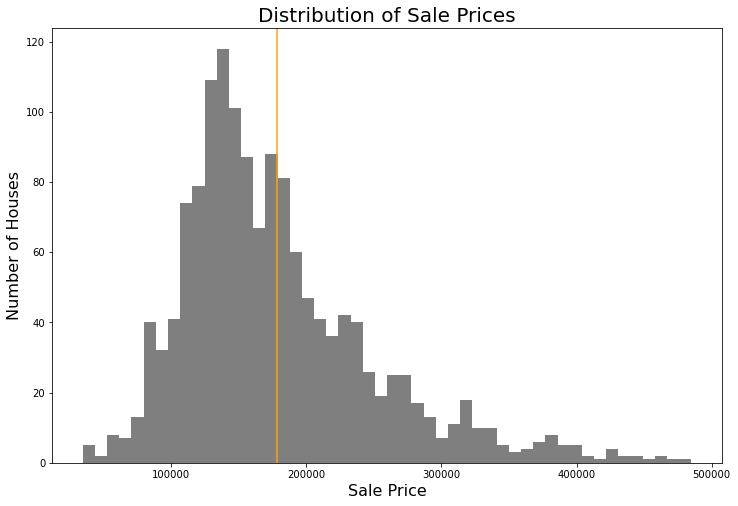

In [4]:
fig, ax= plt.subplots(figsize=(12,8))
ax.hist(Under500['SalePrice'], bins=50, color='black', alpha= 0.5)
ax.set_xlabel('Sale Price', fontsize= 16)
ax.set_ylabel('Number of Houses', fontsize= 16)
ax.set_title('Distribution of Sale Prices', fontsize= 20)
ax.axvline(x= saleprice_mean , color='orange');

    The graph above shows how the number of houses sold is distributed by their price. The first step taken before plotting this graph was to remove any potential outliers that might affect a healthy interpretation of the data. the criterion that was considered was not to include sales prices higher than 500,000 USD. The graph is not symmetric and is skewed to the right. Which would mean that most of the houses sold are below the average price.
    The mean value is around 178,000 USD.

## Differences between Subsets

    For this exercise, it was decided to divide the data set into three groups differentiated according to general quality. To achieve this, the variable 'OverallQual' was considered, which gave a scale of 1-10 on the general quality of the houses, and a range of values was assigned to determine in which quality group the houses sold should be. The first group, of lower quality, was assigned values between 1-and 4. In the second group, of average quality, values between 5-and 7 were assigned. Finally, a group of superior quality, values of 8 and 10 were assigned.

In [5]:
overallQ_low = df.loc[df['OverallQual'] <= 4]
overallQ_med = df[(df['OverallQual'] >= 5) & (df['OverallQual'] <= 7) ]
overallQ_high = df.loc[df['OverallQual'] >= 8]

print(len(overallQ_low))
print(len(overallQ_med))
print(len(overallQ_high))

141
1090
229


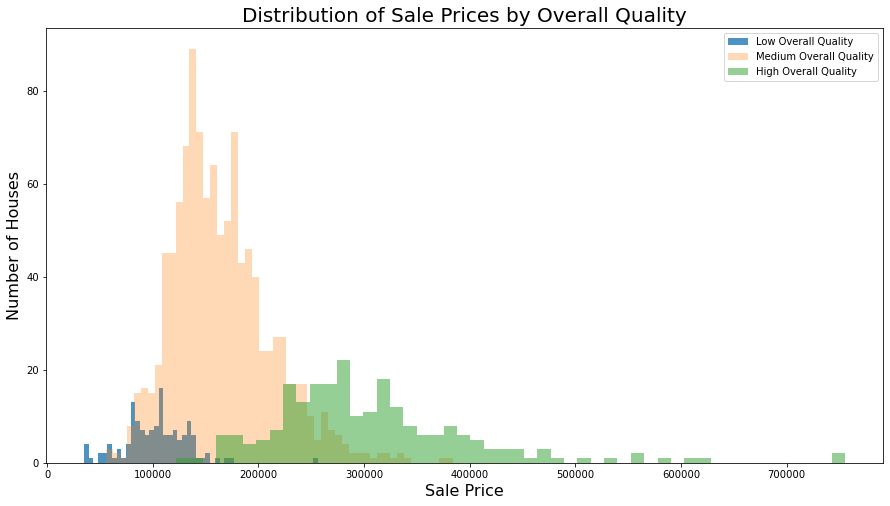

In [6]:
fig, ax= plt.subplots(figsize=(15,8))
ax.hist(x= overallQ_low['SalePrice'], bins=50, alpha=0.8, label= 'Low Overall Quality')
ax.hist(x= overallQ_med['SalePrice'], bins=50, alpha=0.3, label= 'Medium Overall Quality')
ax.hist(x= overallQ_high['SalePrice'], bins=50, alpha=0.5, label= 'High Overall Quality')
ax.set_xlabel('Sale Price', fontsize= 16)
ax.set_ylabel('Number of Houses', fontsize= 16)
ax.set_title('Distribution of Sale Prices by Overall Quality', fontsize= 20)
ax.legend(loc='upper right');

    From the graph above it can be concluded that most of the houses sold between 2006 and 2010 are within the group considered to be of medium quality, ranging between prices of 100k-200k.
    On the other hand, the group of houses sold considered to be of better quality are better distributed, varying between prices of 200k-500k.
    Finally, in the minority group of homes are the homes considered to be of lower quality, varying between prices around 100k.

## Correlation between `OverallQual` and `SalePrice`



In [7]:
print(df['OverallQual'].corr(df['SalePrice']))

0.7909816005838051


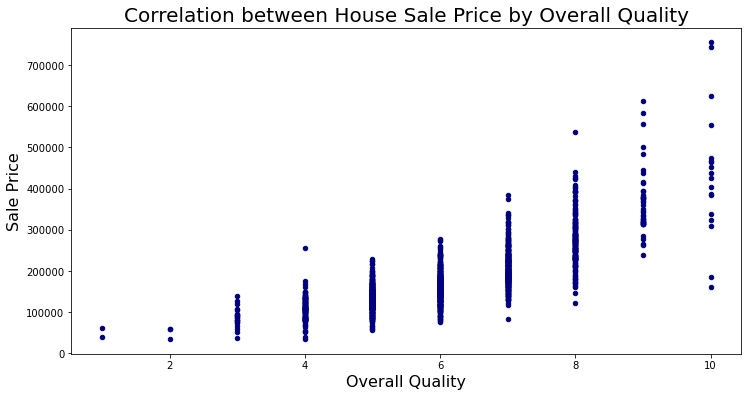

In [8]:
ax1 = df.plot('OverallQual','SalePrice', kind='scatter', figsize=(12,6), color= 'navy', )
ax1.set_title('Correlation between House Sale Price by Overall Quality', fontsize= 20)
ax1.set_xlabel('Overall Quality', fontsize= 16)
ax1.set_ylabel('Sale Price', fontsize= 16);

    The graph above shows a positive correlation of 0.79 between the two selected variables. It can be seen that they are directly proportional between the two variables, so it can be stated in a general way that the better quality a house is considered, the higher its price will be.

## Engineered Feature: `PorchDeckSF`



In [9]:
df['PorchDeckSF'] = (df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PorchDeckSF
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,61
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,298
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,42
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,307
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,276


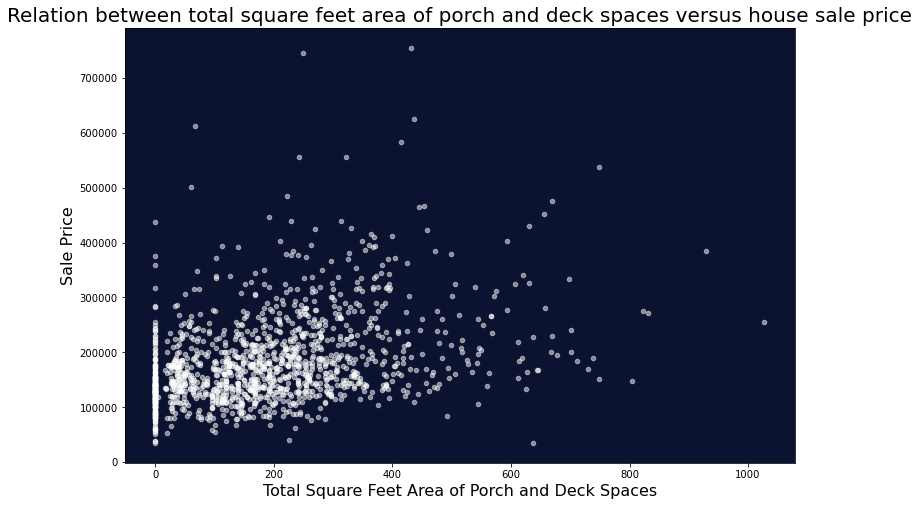

In [10]:
ax2 = df.plot('PorchDeckSF', 'SalePrice', kind= 'scatter', figsize= (12,8), color= 'white', alpha= 0.5)
ax2.set(facecolor='#0b1330')
ax2.set_title('Relation between total square feet area of porch and deck spaces versus house sale price', fontsize=20)
ax2.set_xlabel('Total Square Feet Area of Porch and Deck Spaces', fontsize= 16)
ax2.set_ylabel('Sale Price', fontsize= 16);

In [11]:
df['PorchDeckSF'].corr(df['SalePrice'])

0.3909930203595835

    As can be seen in the graph above, although the correlation is greater than zero, it is not very significant. It has a slight proportional growth between the two variables, but it would not be very sensible to conclude that the greater the area of porches and decks, the higher the price of the houses will be.